## 1. What about the price-range of hotpot restaurants in Chunxi Rd of Chengdu?
### We can see the charts, the common range is between about 65 and 88, the cost of eating hotpot in the central area of Chengdu is not expensive.

In [164]:
from matplotlib import pyplot as plt
import pandas as pd

df = pd.read_csv('dianping2.csv')
#df.head()

plt.rcParams['font.sans-serif']=['SimSun']
plt.rcParams['axes.unicode_minus']=False

In [167]:
df.head()

,Unnamed: 0,remark,price,title,flavour,environment,service
0,0,664,81.0,大院火老火锅(春熙路店),9.0,9.1,9.1
1,1,701,111.0,大侠行江湖火锅(春熙店),8.7,9.3,9.0
2,2,491,67.0,华兴九号辣铺(春熙总店),8.6,9.2,9.0
3,3,1515,81.0,蜀韵蜀味火锅(春熙店),8.7,9.1,8.9
4,4,675,87.0,月满大江火锅(总府路店),9.0,9.1,8.9


Text(0.5,1,'Remark with service mark')

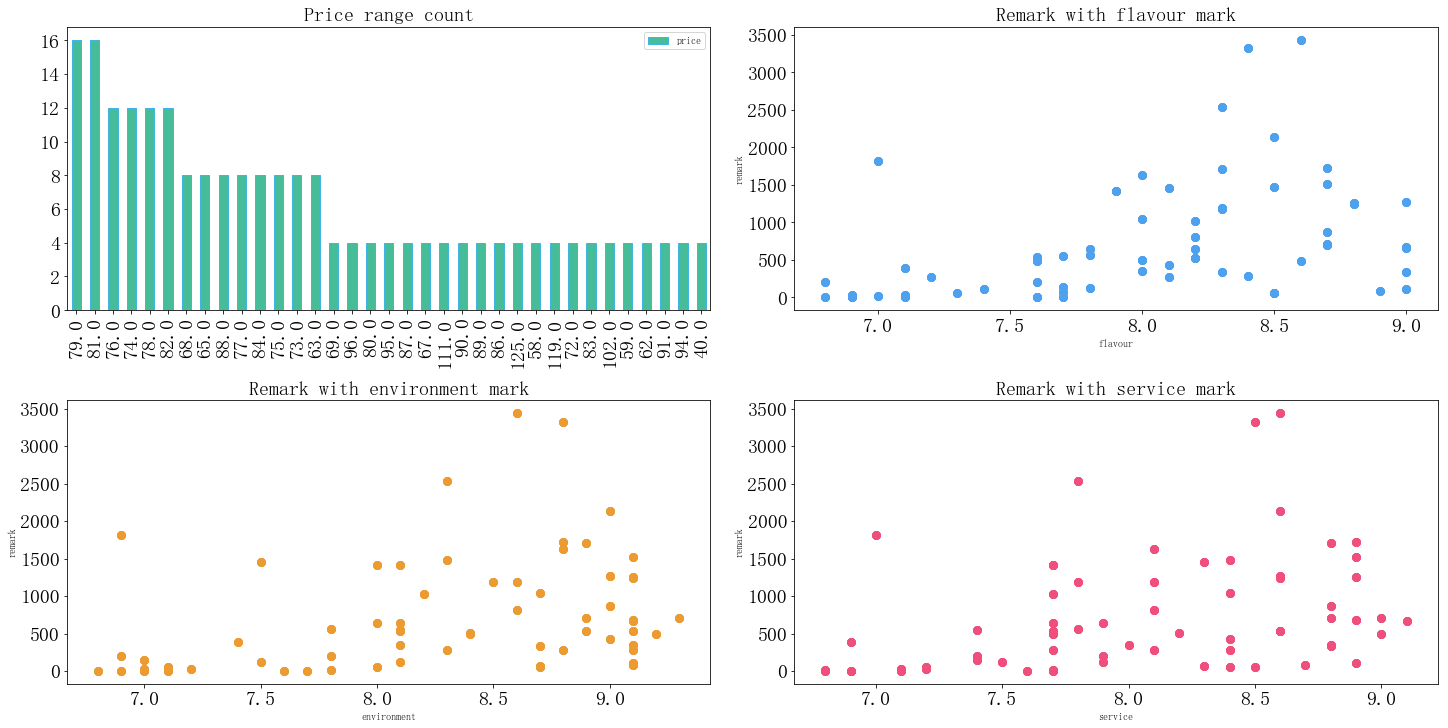

In [173]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(20,10)) 

#plot price range count
price = pd.DataFrame(df['price'].value_counts())
ax1 = price.plot(kind = 'bar',color = '#46bc99',edgecolor = '#40b4e5',ax=axes[0,0],fontsize=20)
ax1.set_title("Price range count",fontsize=20)

#plot remark and flavour scatter
remark_flavour = df[['remark','flavour']]
ax4 = remark_flavour.plot(kind = 'scatter',x='flavour',y='remark',color = '#4ea1ef',ax=axes[0,1],s=60,fontsize=20)
ax4.set_title("Remark with flavour mark",fontsize=20)

#plot remark and environment scatter
remark_environment = df[['remark','environment']]
ax4 = remark_environment.plot(kind = 'scatter',x='environment',y='remark',color = '#ec9b31',ax=axes[1,0],s=60,fontsize=20)
ax4.set_title("Remark with environment mark",fontsize=20)

#plot remark and service scatter
remark_service = df[['remark','service']]
ax4 = remark_service.plot(kind = 'scatter',x='service',y='remark',color = '#f04e7c',ax=axes[1,1],s=60,fontsize=20)
ax4.set_title("Remark with service mark",fontsize=20)

## 2. What about the top-quality hotpot restaurants in this area?
### We can see the bar chart, according to the comprehensive evaluation of the flavour, environment and service marks, I choose the restaurants marks which are over 25 in total, and the top3 hotpot restaurants are 大院火老火锅, 月满大江火锅, 蜀财神火锅.

In [169]:
import pandas as pd
df1 = pd.read_csv('dianping2.csv')

a = df1['flavour']
b = df1['environment']
c = df1['service']
# d = df1['comprehensive']

df1['comprehensive'] = df1['flavour'] + df1['environment'] + df1['service']
df1.head()

,Unnamed: 0,remark,price,title,flavour,environment,service,comprehensive
0,0,664,81.0,大院火老火锅(春熙路店),9.0,9.1,9.1,27.2
1,1,701,111.0,大侠行江湖火锅(春熙店),8.7,9.3,9.0,27.0
2,2,491,67.0,华兴九号辣铺(春熙总店),8.6,9.2,9.0,26.8
3,3,1515,81.0,蜀韵蜀味火锅(春熙店),8.7,9.1,8.9,26.7
4,4,675,87.0,月满大江火锅(总府路店),9.0,9.1,8.9,27.0


In [174]:
df1.to_csv('dianping3.csv')
df2 = pd.read_csv('dianping3.csv')
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from pandas import DataFrame

pd_df1 = df2.groupby(['title'])['comprehensive'].mean().reset_index().sort_values("comprehensive",ascending=False)
data = [go.Bar(x=pd_df1.title[:26],
            y=pd_df1.comprehensive)]
plotly.offline.plot({"data":data, 
                    "layout":go.Layout(yaxis=dict(
            range=[25.0, 27.5]))} #helped by YUCAN
        )

'file:///Users/zengxingjie/Documents/GitHub/python-data-assignments/assignment2/temp-plot.html'

In [172]:
from IPython.display import IFrame
IFrame('temp-plot.html', width=800, height=400)